# Heart Disease Indicators

# Integrantes

- Erlon Lacerda
- Samuel José
- Leo Jaime Costa
- Roberto Rawlison

# Introdução

## Motivação

Nossa motivação para a escolha do tema foi a capacidade do mesmo ser abrangente e complexo. Dados da saúde são mais peculiares de tratar e avaliar já que diversas coisas se relacionam entre si e casos aleatórios não previstos podem ocorrer com frequência. Além disso, houve uma curiosidade sobre os dados em si: "O que podemos aprender sobre a saúde com eles? Podemos descobrir novas coisas?".

## Objetivos

- Entender como as variáveis se interagem;
- Tirar conclusões que casam com estudos na área;
- Descobrir como a saúde, ou a falta dela, pode ter relação com doenças e problemas cardíacos;
- Aplicar, após os estudos, soluções que possam auxiliar na predição e no diagnóstico de problemas cardíacos.

# Dados usados

[Kaggle - Key Heart Disease Indicators](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

### Descrição
2020 annual CDC survey data of 400k adults related to their health status

Este dataset foi obtido a partir de uma limpeza em dados da pesquisa anual CDC (Centers for Disease Control and Prevention), que ocorre nos Estados Unidos por telefone.

#### **Descrição das colunas**

HeartDisease - Entrevistados que já relataram ter doença cardíaca coronária (DCC) ou infarto do miocárdio.

BMI - Índice de Massa Corporal

Smoking - "Você fumou pelo menos 100 cigarros em toda a sua vida?" 5 maços = 100 cigarros

AlcoholDrinking - Alcoolatras (homens adultos que bebem mais de 14 drinques por semana e mulheres adultas que bebem mais de 7 drinques por semana)

Stroke - "Já teve um derrame?"

PhysicalHealth - "Incluindo doenças físicas e lesões, por quantos dias dos últimos 30 dias sua saúde física não foi boa?"

MentalHealth - "Por quantos dias dos últimos 30 dias sua saúde mental não foi boa?"

DiffWalking - "Você tem muita dificuldade para andar ou subir escadas?"
Sex - "Você é homem ou mulher?"

AgeCategory - 14 categorias de idade.

Race - Valor de raça/etnia imputado; White, Black, American Indian/Alaskan Native, Hispanic, Other.

Diabetic - "Você teve diabetes?"

PhysicalActivity - Adultos que relataram fazer atividade física ou exercício durante os últimos 30 dias fora do trabalho regular.

GenHealth - "Você diria que, em geral, sua saúde é excelente, muito boa, boa, regular ou ruim?"

SleepTime - "Em média, quantas horas você dorme em um período de 24 horas?"
Asthma - "Você já teve asma?"

KidneyDisease - "Sem incluir cálculos renais, infecção da bexiga ou incontinência, alguma vez lhe disseram que tinha doença renal?"

SkinCancer - "Você já teve câncer de pele?"

# Pré-processamento

In [175]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [176]:
# Criando um DataFrame para o dataset escolhido
df = pd.read_csv("https://raw.githubusercontent.com/erlonL/Projeto-ICD/main/heart-disease.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Como o dataset já foi tratado e limpo, não há valores nulos.

## Tratamento de dados

Criamos uma coluna numérica para a coluna "GenHealth" (saúde geral), pois como são dados categóricos, podemos trocar por valores numéricos sem problemas. Seguirá uma escala de 1 a 5, indo de "Fraca", para "Excelente".

In [177]:
# Tratamento para melhor visualização
def troca_por_categoria(valor_coluna):
  if valor_coluna == "Poor":
    valor_coluna = 1
  elif valor_coluna == "Fair":
    valor_coluna = 2
  elif valor_coluna == "Good":
    valor_coluna = 3
  elif valor_coluna == "Very good":
    valor_coluna = 4
  elif valor_coluna == "Excellent":
    valor_coluna = 5
  return valor_coluna

df['GenHealthNUM'] = df['GenHealth'].apply(troca_por_categoria)

In [178]:
# Essa coluna possui valores diferentes das outras, assumimos que  
#"No, borderline diabetes" vale 0.0 e "Yes (during pregnancy)" vale 1.0 

df['DiabeticNUM'] = df['Diabetic'].replace({"Yes": 1.0, "No": 0.0, "No, borderline diabetes": 0.0, "Yes (during pregnancy)": 1.0})

Como a pergunta era "Você teve diabetes?", as informações após "Não" e "Sim" não são relevantes, então decidimos trocar por apenas "No" e "Yes".

In [179]:
# Trocar Diabetic por apenas Yes ou apenas No
df['Diabetic'] = df['Diabetic'].replace({"No, borderline diabetes": "No", "Yes (during pregnancy)": "Yes"})

Criamos uma nova coluna apenas com as classificações do BMI, pois os valores estavam muito flutuantes. Ela segue a classificação padrão.

In [206]:
def classifica_imc(valor_coluna):
  if valor_coluna < 18.5:
    valor_coluna = "Abaixo do Peso"
  elif valor_coluna < 25:
    valor_coluna = "Peso Ideal"
  elif valor_coluna < 30:
    valor_coluna = "Acima do Peso"
  elif valor_coluna < 35:
    valor_coluna = "Obesidade Grau I"
  elif valor_coluna < 40:
    valor_coluna = "Obesidade Grau II"
  else:
    valor_coluna = "Obesidade Grau III"
  return valor_coluna

def classifica_imc_num(valor_coluna):
  if valor_coluna < 18.5:
    valor_coluna = 1
  elif valor_coluna < 25:
    valor_coluna = 2
  elif valor_coluna < 30:
    valor_coluna = 3
  elif valor_coluna < 35:
    valor_coluna = 4
  elif valor_coluna < 40:
    valor_coluna = 5
  else:
    valor_coluna = 6
  return valor_coluna

# Criando colunas do BMI de acordo com a classificação de peso
df["BMI_Classification"] = df["BMI"].apply(classifica_imc) 
df["BMI_Classification_NUM"] = df["BMI"].apply(classifica_imc_num)

Criamos uma categorização para a coluna "SleepTime".

In [182]:
bins = [1, 5, 10, 15, 24]
labels = ['1-5', '6-10', '11-15', '16-24']

df['SleepTimeCat'] = pd.cut(df['SleepTime'], bins=bins, labels=labels)

In [193]:
df['HeartDiseaseNUM'] = df['HeartDisease'].replace({"Yes": 1.0, "No": 0.0}) 
df['SmokingNUM'] = df['Smoking'].replace({"Yes": 1.0, "No": 0.0})
df['AlcoholDrinkingNUM'] = df['AlcoholDrinking'].replace({"Yes": 1.0, "No": 0.0})
df['StrokeNUM'] = df['Stroke'].replace({"Yes": 1.0, "No": 0.0}) 
df['DiffWalkingNUM'] = df['DiffWalking'].replace({"Yes": 1.0, "No": 0.0}) 
df['PhysicalActivityNUM'] = df['PhysicalActivity'].replace({"Yes": 1.0, "No": 0.0})
df['AsthmaNUM'] = df['Asthma'].replace({"Yes": 1.0, "No": 0.0})
df['KidneyDiseaseNUM'] = df['KidneyDisease'].replace({"Yes": 1.0, "No": 0.0})
df['SkinCancerNUM'] = df['SkinCancer'].replace({"Yes": 1.0, "No": 0.0})

# A coluna "Diabetic" possui valores diferentes das outras, assumimos que  
#"No, borderline diabetes" vale 0.0 e "Yes (during pregnancy)" vale 1.0 
df['DiabeticNUM'] = df['Diabetic'].replace({"Yes": 1.0, "No": 0.0, "No, borderline diabetes": 0.0, "Yes (during pregnancy)": 1.0})

# criando uma nova coluna numérica baseada nos valores de GenHealth
# A nova coluna GenHealthNUM segue uma ordem de classificação, em que 1 é a pior saúde geral e 5 a melhor
df['GenHealthNUM'] = df['GenHealth'].replace({"Poor": 1.0, "Fair": 2.0, "Good": 3.0, "Very good": 4.0, "Excellent": 5.0}) 

# Perguntas:

- Como o sono impacta na saúde do indivíduo?
- Como as variáveis influenciam no problema cardíaco?
- Como os hábitos e fatores controláveis influenciam no surgimento de um problema cardíaco?
- Como a raça e o sexo podem influenciar em problemas cardíacos?


## Como o sono impacta na saúde do indivíduo?

Primeiro vamos conhecer os índices de sono médio da base de dados:

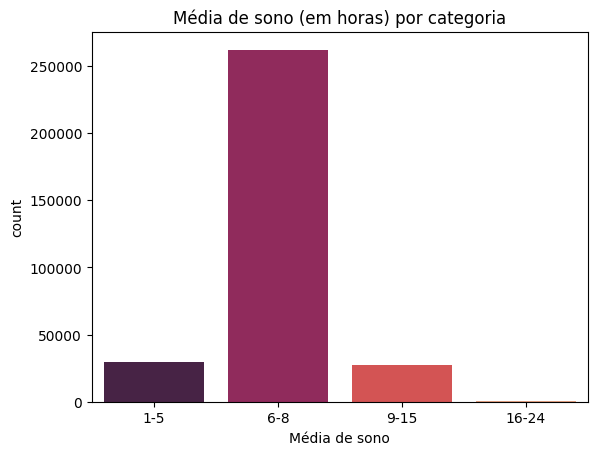

In [183]:
bins = [1, 5, 8, 15, 24]
labels = ['1-5', '6-8', '9-15', '16-24']

sns.countplot(x = pd.cut(df['SleepTime'], bins=bins, labels=labels), palette = 'rocket')
plt.title('Média de sono (em horas) por categoria')
plt.xlabel('Média de sono')
plt.show()

Observa-se que a grande maioria das pessoas na base de dados tem uma média de 6-8 horas de sono por noite.

Agora vejamos a relação entre a Saúde Geral do indivíduo com a média de sono.

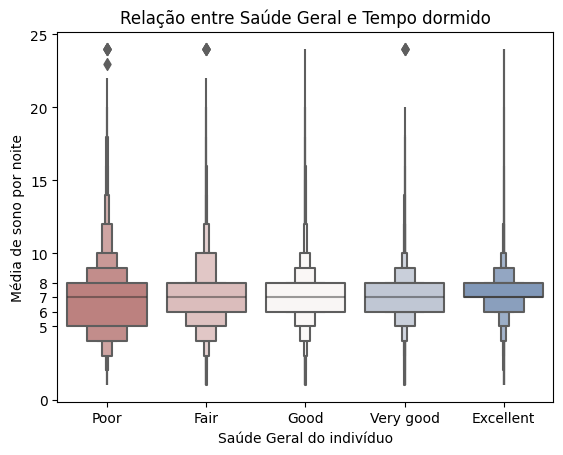

In [184]:
sns.boxenplot(data = df, y = 'SleepTime', x = 'GenHealth', palette = 'vlag_r', order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
plt.yticks([0, 5, 6, 7, 8, 10, 15, 20, 25])
plt.xlabel('Saúde Geral do indivíduo')
plt.ylabel('Média de sono por noite')
plt.title('Relação entre Saúde Geral e Tempo dormido')
plt.show()

Podemos ver que as pessoas com as piores saúdes gerais, têm uma maior tendência a dormir entre 7 e 5 horas por dia. Em comparação as que responderam uma saúde geral excelente tem uma tendência a dormir entre 8 e 7 horas por dia.

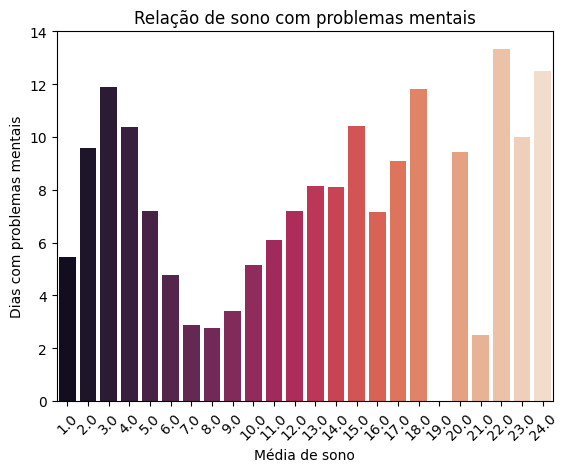

In [185]:
SleepTime_proportion = df.groupby('SleepTime')['MentalHealth'].mean()

sns.barplot(data = SleepTime_proportion.reset_index(), x = 'SleepTime', y='MentalHealth', palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Média de sono')
plt.ylabel('Dias com problemas mentais')
plt.title('Relação de sono com problemas mentais')

plt.show()

Supondo que os dados para 19 e 21 horas de sono médias por dia sejam insuficientes ou nulos, vemos que entre 7 e 8 horas, estão as pessoas com os menores índices de dias com problemas mentais.

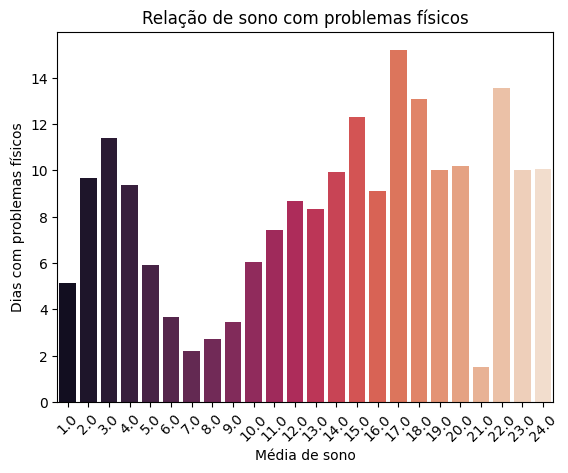

In [186]:
SleepTime_proportion2 = df.groupby('SleepTime')['PhysicalHealth'].mean()

sns.barplot(data = SleepTime_proportion2.reset_index(), x = 'SleepTime', y='PhysicalHealth', palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Média de sono')
plt.ylabel('Dias com problemas físicos')
plt.title('Relação de sono com problemas físicos')

plt.show()

Um pouco diferente desta vez, e também, supondo que os dados para 21 horas são insuficientes ou nulos, vemos que entre 6 e 9 horas estão os menores índices de dias com problemas físicos. Também observa-se que os dados para 6 e 9 horas são bem parecidos, podendo indicar uma possível relação entre os dois.

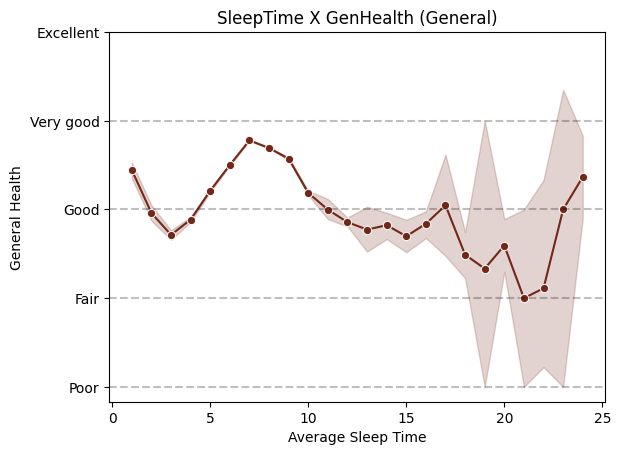

In [187]:
sns.lineplot(x = df["SleepTime"], y = df["GenHealthNUM"], marker='o', color = '#722717')

plt.title('SleepTime X GenHealth (General)')
xtick_labels = ["Poor", "Fair", "Good", "Very good", "Excellent"]
plt.yticks([1, 2, 3, 4, 5], xtick_labels)

plt.ylabel("General Health")
plt.xlabel("Average Sleep Time")

for i in range(1, 6):
    plt.axhline(y=i, linestyle='--', color='black', alpha = 0.25)
  
plt.show()

Com maior clareza, podemos ver que as pessoas que dormem entre 7 e 8 horas por dia têm a melhor saúde geral.
Também pode-se observar que entre 5 e 10 horas estão as pessoas com os índices mais regulares de saúde geral, com poucos outliers.

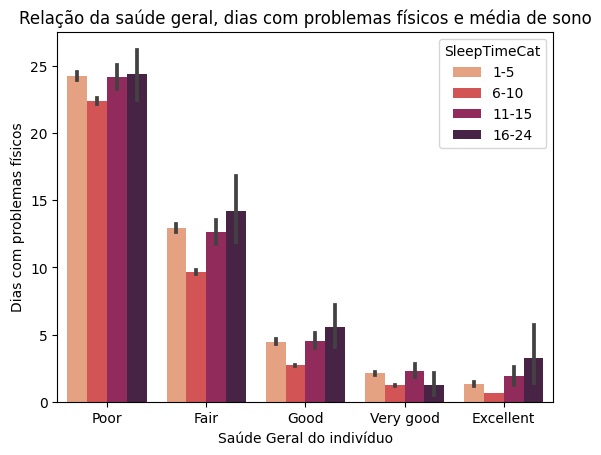

In [188]:
sns.barplot(data=df, x="GenHealth", y="PhysicalHealth", hue="SleepTimeCat", palette="rocket_r", order = ["Poor", "Fair", "Good", "Very good", "Excellent"])
plt.xlabel('Saúde Geral do indivíduo')
plt.ylabel('Dias com problemas físicos')
plt.title('Relação da saúde geral, dias com problemas físicos e média de sono')
plt.show()

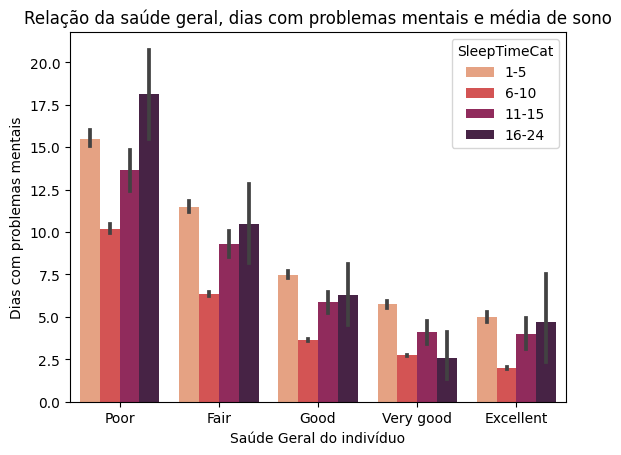

In [189]:
sns.barplot(data=df, x="GenHealth", y="MentalHealth", hue="SleepTimeCat", palette="rocket_r", order = ["Poor", "Fair", "Good", "Very good", "Excellent"])
plt.xlabel('Saúde Geral do indivíduo')
plt.ylabel('Dias com problemas mentais')
plt.title('Relação da saúde geral, dias com problemas mentais e média de sono')
plt.show()

Agora, observando os dados mais geralmente utilizando dias com problemas de saúde com a Saúde Geral do indivíduo, podemos observar que os indivíduos que dormem entre 6 a 10 horas por dia, tiveram menos dias com problemas de saúde tanto físico, quanto mental. Os dados também se mantêm mais estáveis para este grupo, com menor quantidade de outliers.

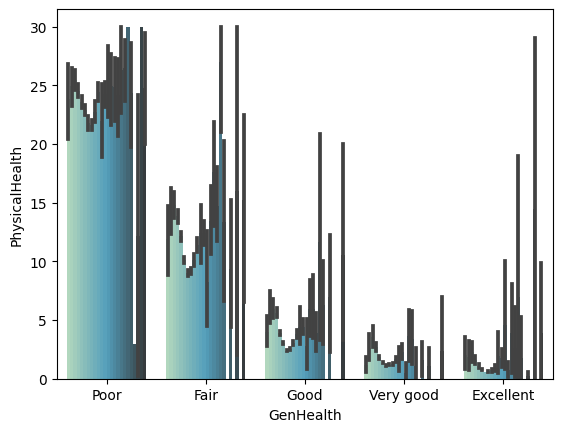

In [190]:
sns.barplot(data=df, x="GenHealth", y="PhysicalHealth", hue="SleepTime", palette="GnBu_d", order = ["Poor", "Fair", "Good", "Very good", "Excellent"])
plt.legend().remove()
plt.show()

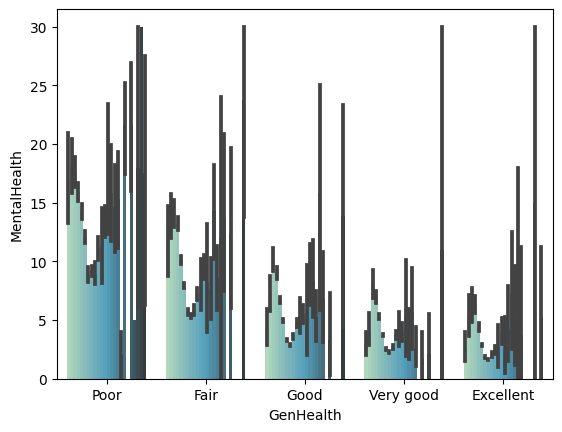

In [191]:
sns.barplot(data=df, x="GenHealth", y="MentalHealth", hue="SleepTime", palette="GnBu_d", order = ["Poor", "Fair", "Good", "Very good", "Excellent"])
plt.legend().remove()

Agora, observando os gráficos sem a categorização, se observa uma grande quantidade de outliers, principalmente quando a média de sono por noite aumenta acima de 10 horas.

Logo, conclui-se que o sono tem grande impacto na saúde de um indivíduo, impactando principalmente a saúde mental, o que inevitavelmente impacta na saúde geral. Segundo estudos, um adulto precisa de 7 ou mais horas de sono de qualidade por dia para se sentir descansado durante o dia, também para ter menores problemas de saúde.

Referência: https://health.gov/myhealthfinder/healthy-living/mental-health-and-relationships/get-enough-sleep

Mas também, o sono em excesso pode impactar na saúde do indivíduo, até porque pode ser um sinal de uma desordem, como hipersonia ou depressão.

Referência: https://www.webmd.com/sleep-disorders/physical-side-effects-oversleeping

## Como as variáveis influenciam no problema cardíaco?

Para responder a esta pergunta percorreremos o DataFrame, calculando a proporção entre as variáveis e o problema cardíaco.

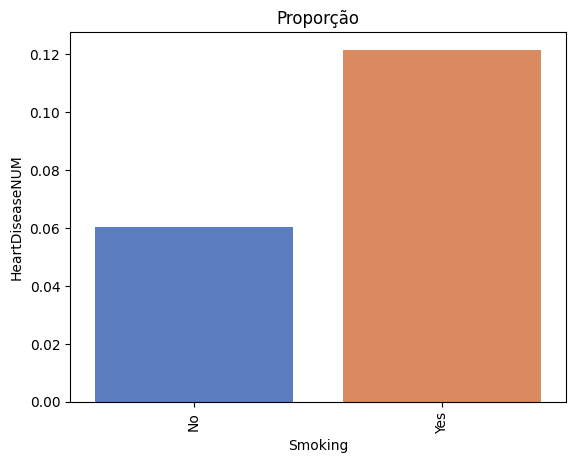

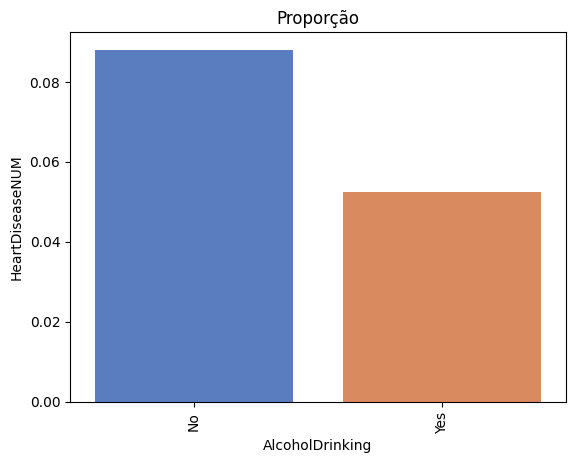

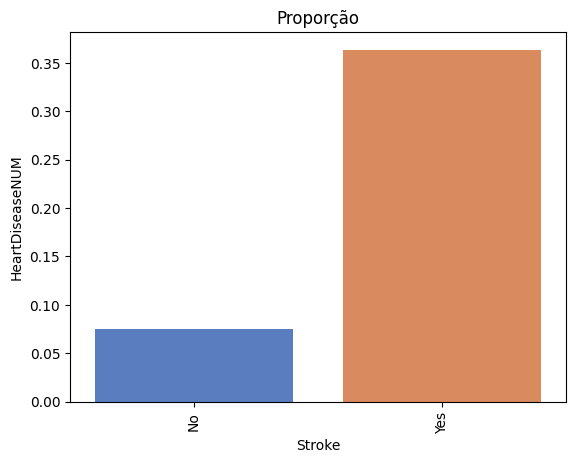

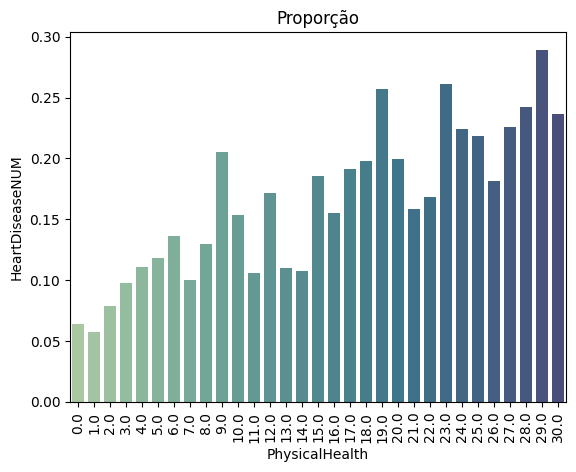

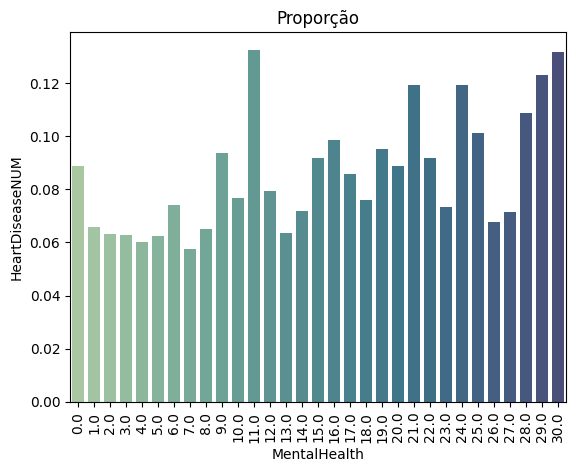

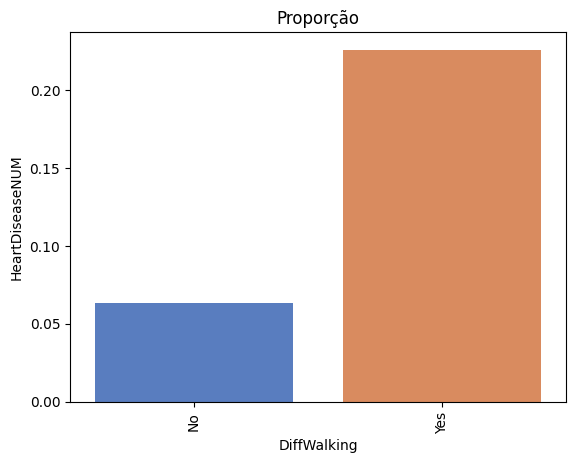

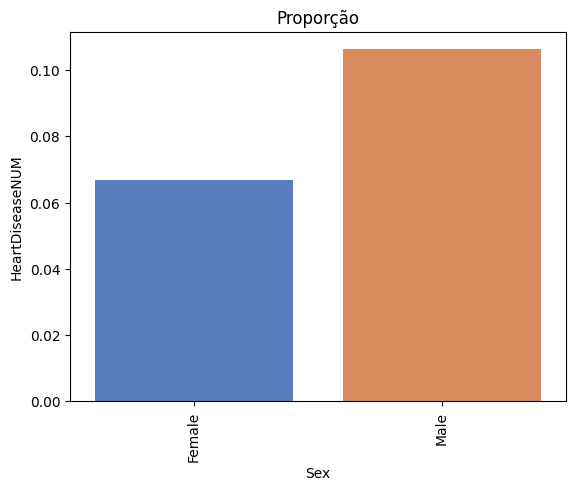

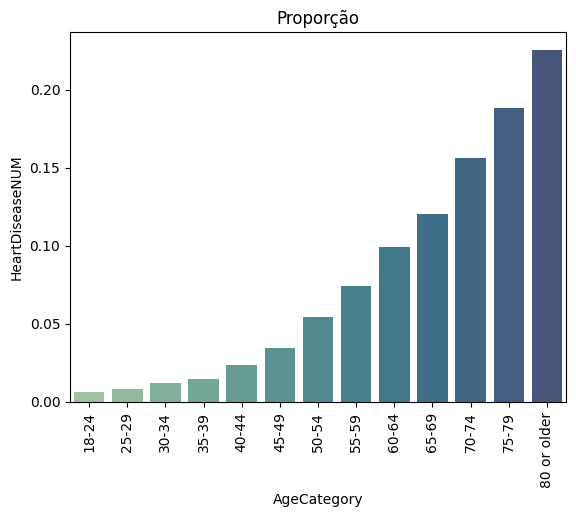

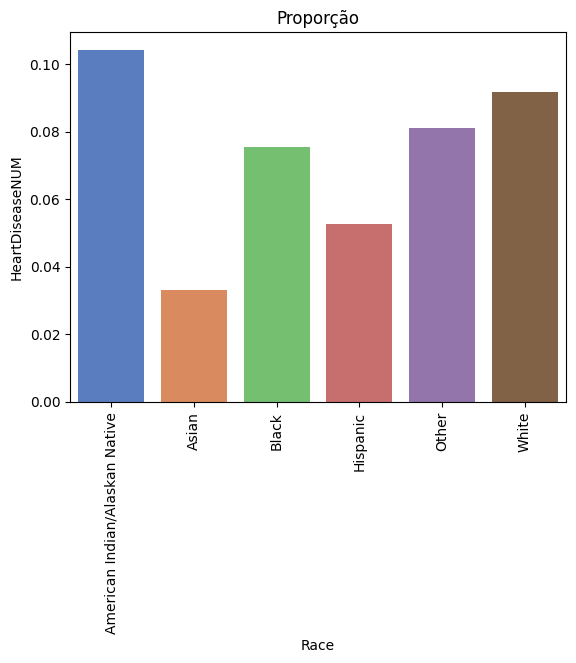

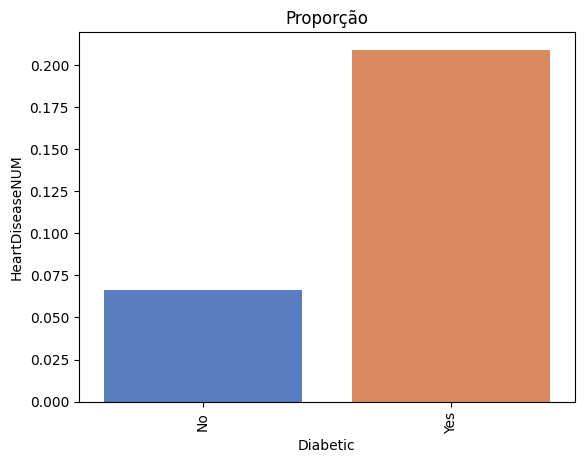

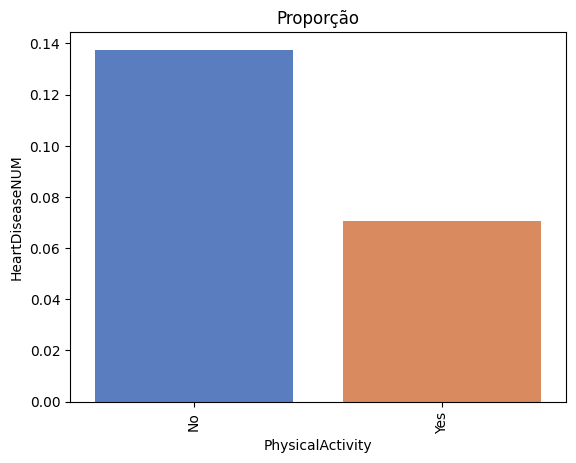

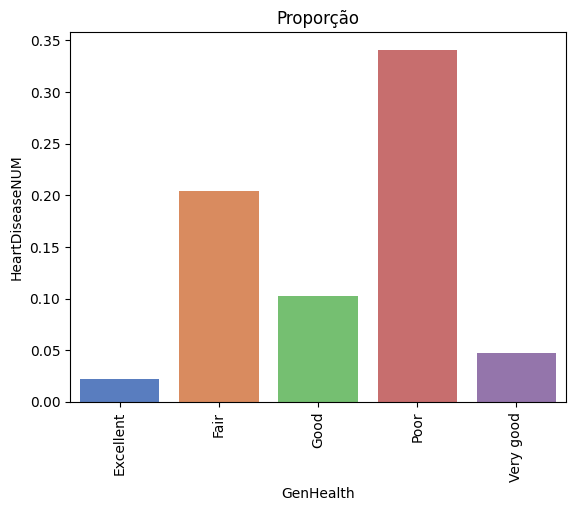

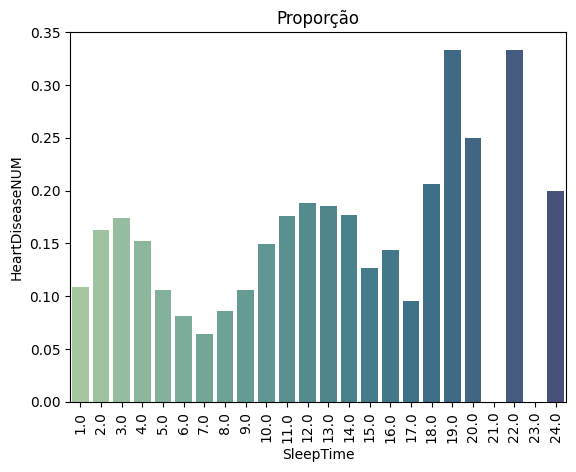

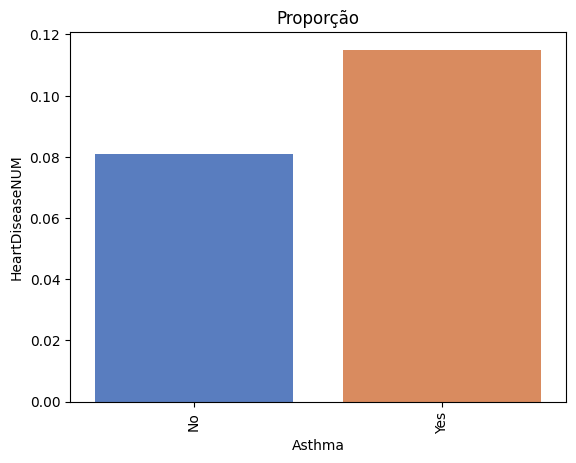

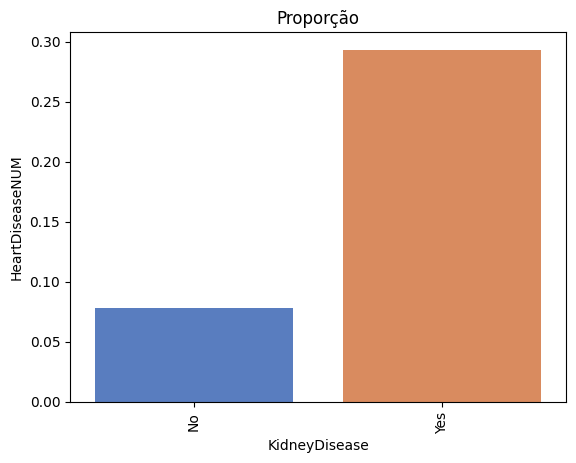

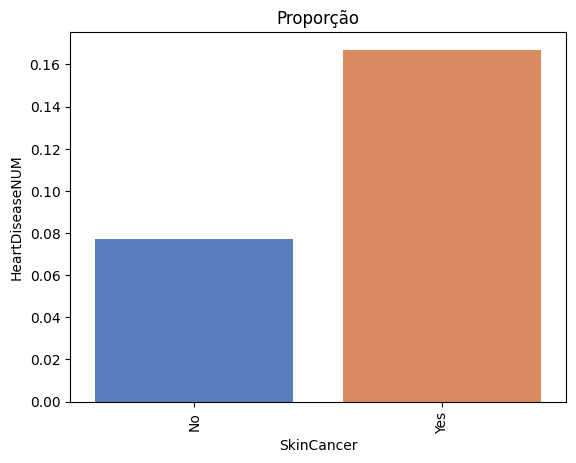

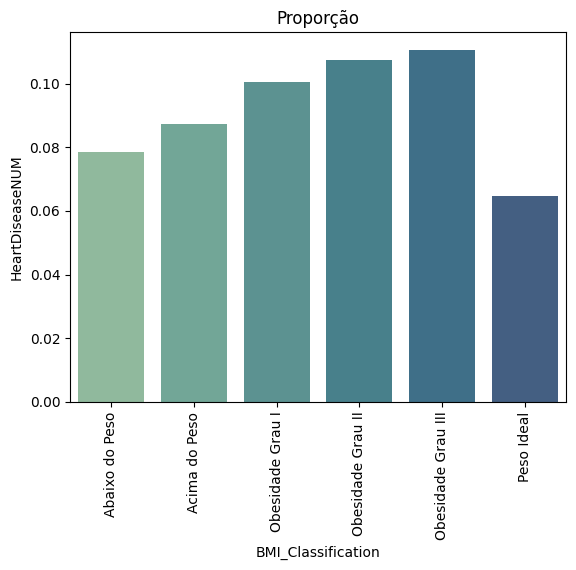

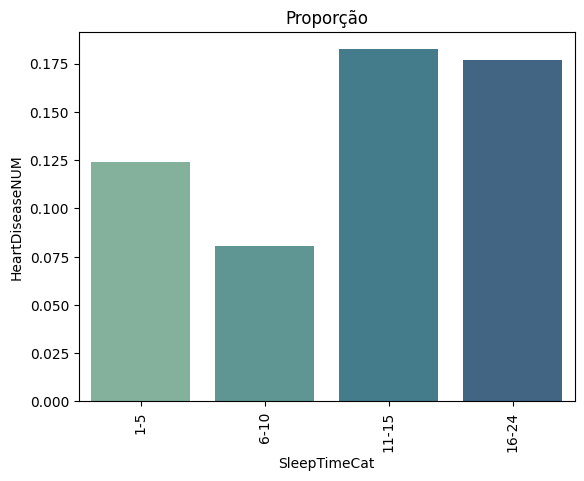

In [194]:
for i in df:
  if 'NUM' not in i and 'num' not in i and i != 'HeartDisease' and i != 'BMI':
    if i != 'PhysicalHealth' and i != 'MentalHealth' and i != 'AgeCategory' and i != 'SleepTime' and i != 'BMI_Classification' and i != 'SleepTimeCat':
      proporcao2 = df.groupby(i)['HeartDiseaseNUM'].mean()
      sns.barplot(data = proporcao2.reset_index(), x = i, y='HeartDiseaseNUM', palette = 'muted')   
      plt.title('Proporção')
      plt.xticks(rotation = 90)
      plt.show()
    else:
      proporcao2 = df.groupby(i)['HeartDiseaseNUM'].mean()
      sns.barplot(data = proporcao2.reset_index(), x = i, y='HeartDiseaseNUM', palette = 'crest', alpha = 0.9)   
      plt.title('Proporção')
      plt.xticks(rotation = 90)
      plt.show()

Com o visto, podemos destacar alguns pontos importantes:

- O ato de fumar pode possuir uma grande relação com o problema cardíaco;
- A medida que a idade aumenta, pode aumentar as chances de um problema cardíaco;
- Pessoas que não praticam atividade física regular tiveram maiores índices de problema cardíaco.

Aqui podemos observar que várias variáveis aparentam ter relação com os problemas cardíacos.
Algumas já são esperadas, como o ato de fumar e não praticar atividades físicas, mas outras variáveis apresentaram ter uma possível relação improváveis, como o caso do câncer de pele. Porém, alguns casos provavelmente são apenas relações que não implicam causa.


## Como a raça e o sexo podem influenciar em problemas cardíacos?

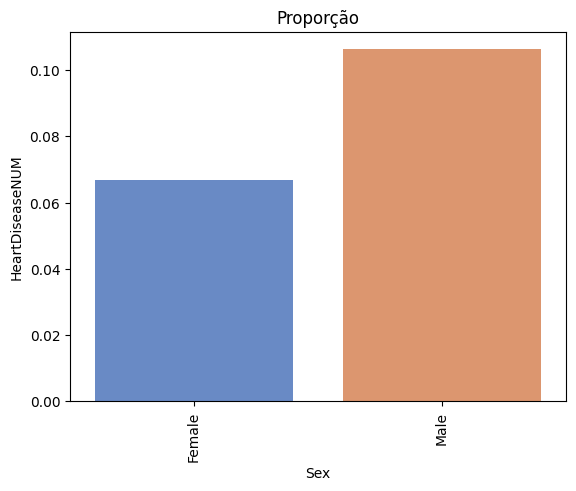

In [195]:
proporcao2 = df.groupby('Sex')['HeartDiseaseNUM'].mean()
sns.barplot(data = proporcao2.reset_index(), x = 'Sex', y='HeartDiseaseNUM', palette = 'muted', alpha = 0.9)   
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()

Nesse caso acima podemos ver que o sexo aparenta ter relação com as doenças cardíacas, e realmente existem estudos que apontam esse fato: homens possui maiores relação com problemas cardíacos.

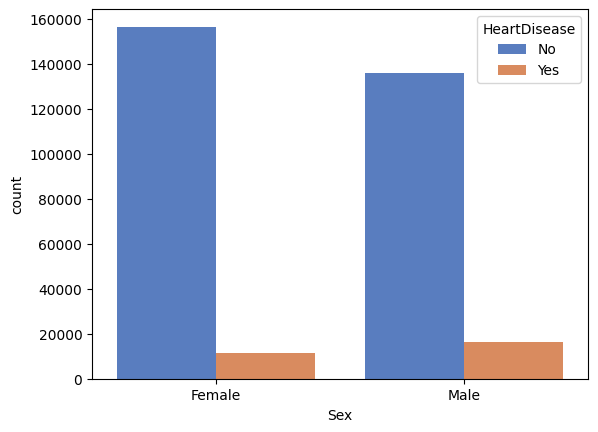

In [196]:
# Relação de gênero e problemas no coração
sns.countplot(data = df, x = "Sex", hue = 'HeartDisease', palette = 'muted')
plt.show()

Nesse gráfico é possível ter a mesma conclusão, mas utilizando a própria contagem de dados.
mesmo com um número maior de mulheres na base de dados, o número de homens com problemas cardíacos superam o número de mulheres com o mesmo problema.

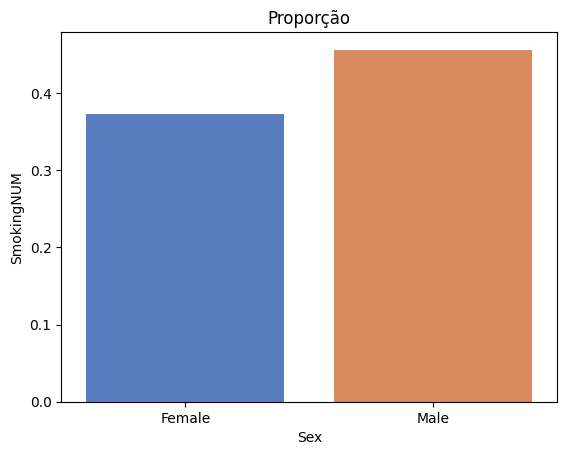

In [197]:
proporcao = df.groupby('Sex')['SmokingNUM'].mean()
sns.barplot(data = proporcao.reset_index(), x = 'Sex', y = 'SmokingNUM', palette = 'muted')
plt.title('Proporção')
plt.show()

Uma das conclusões que tiramos é que o hábito de fumar contribui para o aparecimento de doenças cardíacas, com base nos dados achados e por estados científicos. Com isso, vimos na base que homens em média tendem a fumar mais que a mulheres, e isso pode ser um dos fatores para ser mais alta a taxa de problemáticos cardíacos.

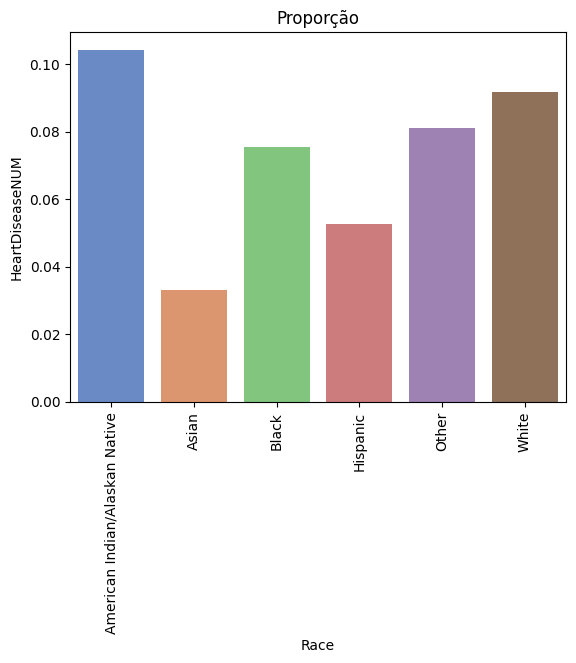

In [198]:
proporcao2 = df.groupby('Race')['HeartDiseaseNUM'].mean()
sns.barplot(data = proporcao2.reset_index(), x = 'Race', y='HeartDiseaseNUM', palette = 'muted', alpha = 0.9)   
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()

Podemos ver a relação de algumas raças com problemas cardíacos, os American Indian / Alaskan Native possuem maiores taxas, juntamente com os brancos. Além disso, é possível perceber que os asiáticos possuem as menores taxas.

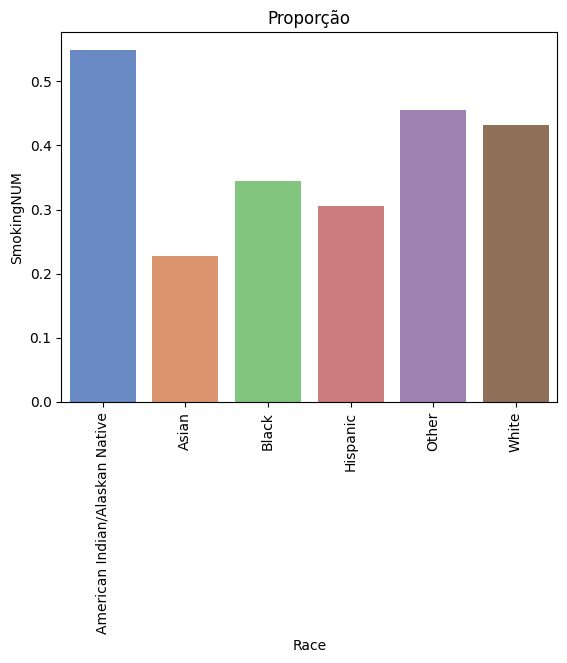

In [199]:
proporcao2 = df.groupby('Race')['SmokingNUM'].mean()
sns.barplot(data = proporcao2.reset_index(), x = 'Race', y='SmokingNUM', palette = 'muted', alpha = 0.9)   
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()

Quando comparamos as raças em relação ao tavagismo, encontramos novamente os brancos e "American Indian / Alaskan Native" entre os maiores índices, juntamente agora com outras raças. Além disso, os asiáticos possuem novamente as menores taxas.

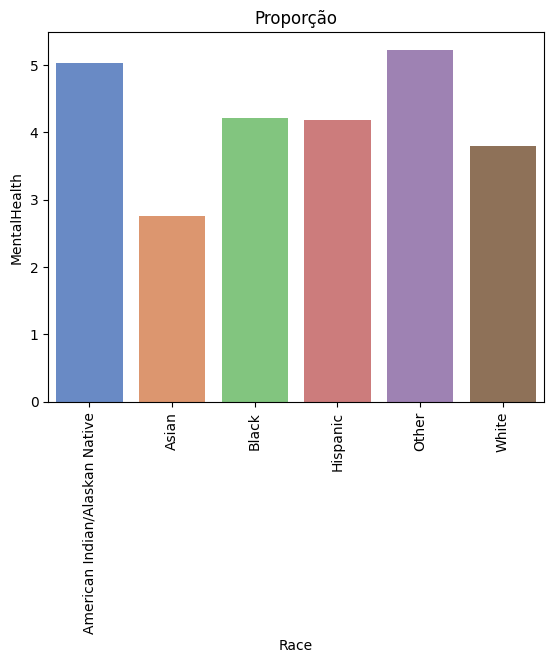

In [200]:
proporcao2 = df.groupby('Race')['MentalHealth'].mean()
sns.barplot(data = proporcao2.reset_index(), x = 'Race', y='MentalHealth', palette = 'muted', alpha = 0.9)   
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()

Combinando outras variáveis podemos ver que os asiáticos novamente possuem os menores índices, dessa vez avaliando dias com problemas de saúde mental, eles possuem a menor média.

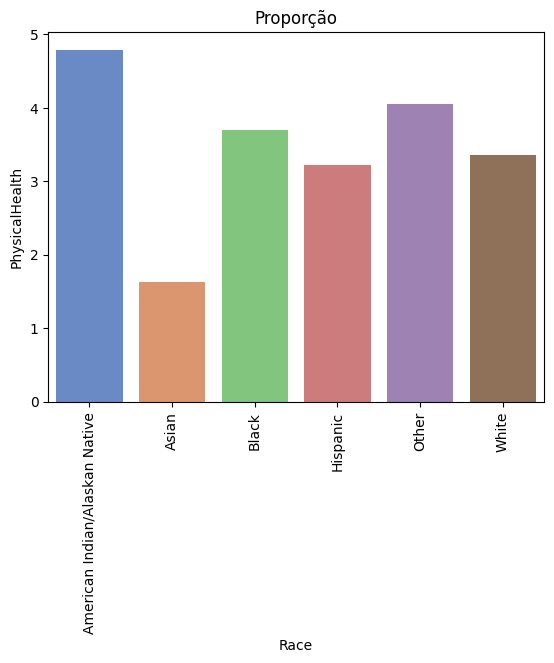

In [201]:
proporcao2 = df.groupby('Race')['PhysicalHealth'].mean()
sns.barplot(data = proporcao2.reset_index(), x = 'Race', y='PhysicalHealth', palette = 'muted', alpha = 0.9)   
plt.title('Proporção')
plt.xticks(rotation = 90)
plt.show()

Combinando a variável de dias com problemas físicos podemos ver que os asiáticos novamente possuem os menores índices.


De forma geral, essas análises com raças mostraram que os "American Indian / Alaskan Native" possuem as piores taxas, incluindo problemas cardíacos e os asiáticos ficaram com as melhores taxas.

## Como os hábitos e fatores controláveis influenciam no problema cardíaco?

Para responder a essa pergunta iremos combinar variáveis com valores específicos.

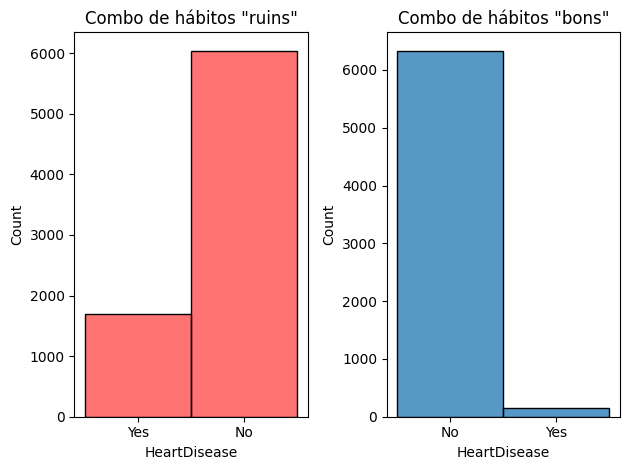

In [202]:
df_novo = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9))]

df_novo2 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9)]

plt.subplot(1, 2, 1)
sns.histplot(data=df_novo, x='HeartDisease', alpha=0.55, color = 'red')
plt.title('Combo de hábitos "ruins"')

plt.subplot(1, 2, 2)
sns.histplot(data=df_novo2, x='HeartDisease')
plt.title('Combo de hábitos "bons"')

plt.tight_layout()  
plt.show()

**Hábitos ruins:** Já fumou pelo menos 100 cigarros na vida, não bebe regularmente, não pratica atividade física regularmente, dorme ou menos de 6 horas, ou mais de 9 horas.

**Hábitos bons:** Não fumou pelo menos 100 cigarros na vida, bebe regularmente, pratica atividade física regularmente, dorme entre 6 e 9 horas por dia.

Avaliando combos de hábitos "ruins" e "bons" podemos perceber que as pessoas que possuem hábitos "bons" possuem um número consideravelmente menor de problématicos cardíacos, demonstrando que os hábitos influenciam muito na doença.

<Axes: xlabel='Sex', ylabel='count'>

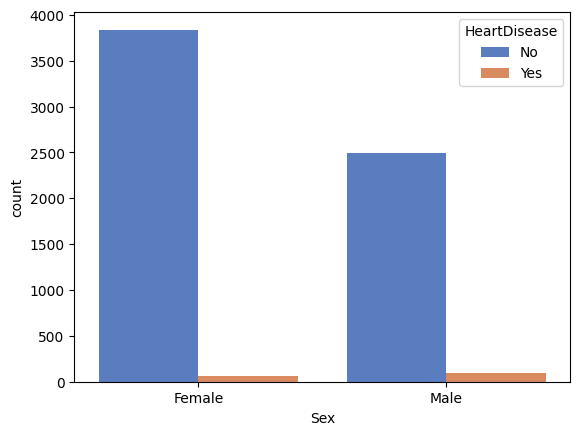

In [203]:
df_novo5 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9)]

sns.countplot(data = df_novo5, x = 'Sex', hue = 'HeartDisease', palette = 'muted')

Nesse gráfico comparamos os hábitos "bons" e a sua contagem pelo sexo.
Podemos perceber que a maioria contém mulheres, mas mesmo assim os homens possuem maiores taxas de problemáticos cardíacos.

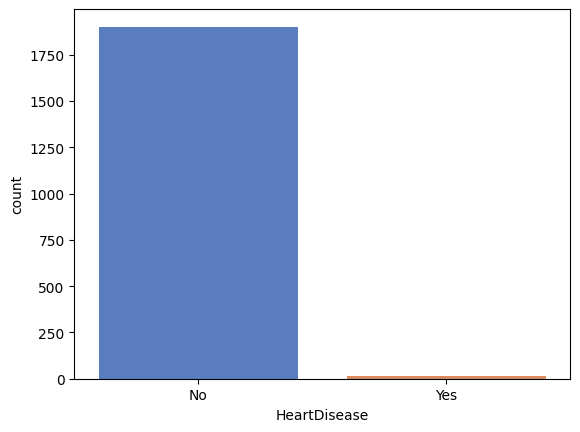

In [207]:
df_novo3 = df[(df['Smoking'] == 'No') &
             (df['AlcoholDrinking'] == 'Yes') &
             (df['PhysicalHealth'] <= 5) &
             (df['PhysicalActivity'] == 'Yes') &
             (df['SleepTime'] >= 6) &
             (df['SleepTime'] <= 9) &
             (df['Stroke'] == 'No') &
             (df['DiffWalking'] == 'No') &
             (df['DiabeticNUM'] == 0) &
             (df['GenHealthNUM'] >= 3) &
             (df['Asthma'] == 'No') & 
             (df['KidneyDisease'] == 'No') &
             (df['SkinCancer'] == 'No') &
             (df['BMI_Classification_NUM'] < 3)]
             
sns.countplot(data = df_novo3, x = 'HeartDisease', palette = 'muted')
plt.show()

Nesse caso relacionamos várias variáveis que foram positivas nas análises e contamos aqueles que possuem e não possuem doença cardíaca.
É possível ver que tiveram pouquíssimas pessoas com problema.

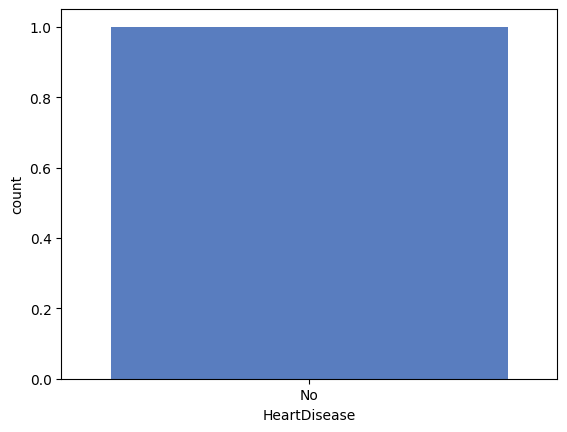

In [208]:
df_novo4 = df[(df['Smoking'] == 'Yes') &
             (df['AlcoholDrinking'] == 'No') &
             (df['PhysicalHealth'] > 5) &
             (df['PhysicalActivity'] == 'No') &
             ((df['SleepTime'] < 6) |
             (df['SleepTime'] > 9)) &
             (df['Stroke'] == 'Yes') &
             (df['DiffWalking'] == 'Yes') &
             (df['Sex'] == 'Male') &
             (df['DiabeticNUM'] == 1) &
             (df['GenHealthNUM'] < 3) &
             (df['Asthma'] == 'Yes') & 
             (df['KidneyDisease'] == 'Yes') &
             (df['SkinCancer'] == 'Yes') &
             (df['BMI_Classification_NUM'] > 3)]

sns.countplot(data = df_novo4, x = 'HeartDisease', palette = 'muted')
plt.show()

Nesse gráfico separamos as variáveis mais negativos e vimos que apenas uma pessoa possui, e não tem problema cardíaco.

# Conclusão

## Resultados encontrados


Com o estudo da base de dados, conseguimos compreender como vários fatores impactam na saúde de um indivíduo:
- Observamos que o sexo e raça aparentam ter relação com problemas cardíacos;
- A saúde física e mental estão relacionadas entre si;
- Muitos fatores podem influenciam problemas no coração, como o IMC, problemas no rim, falta de atividade física e outros fatores;
- O sono possui um papel importante na saúde;
- Os hábitos pessoais possuem grande impacto na saúde cardíaca.


## Limitações

Alguns dados aparentam ser irreais, logo inconclusivos, como o SleepTime (média de sono por noite) de mais de 20 horas e pessoas de BMI's altíssimos mas sem problemas físicos (como dificuldade de andar).
São muitas variáveis e não foi possível fazer uma análise pontual e completa.

## Melhorias possíveis

- Tratar os dados que aparentam ser falsos (outliers);
- Fazer mais relações gráficas para tirar mais conclusões;
- Implementar ferramentas estatísticas para mais conclusões precisas.

## Trabalhos futuros

Há uma possibilidade de implementação de machine learning na base de dados para predição e diagnóstico.